# Memoria Práctica 0 - MonteCarlo

Para esta práctica 0 hemos dividido el trabajo en dos partes: Adrián se ha encargado de la parte de llevar a cabo el algoritmo mediante bucles, mientras que Jose María se ha encargado de la parte de vectorización.

A continuación se muestra el ejercicio completo con la solución. Vamos a explicar qué hace cada parte del código empezando por la parte de vectorización.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def createFunction(fun, a, b, num_puntos):
    M = np.arange(a, b, 0.01/num_puntos)
    Y = fun(M)
    return M, Y;

def createPoints(fun, a, b, M, Y):
        #Ajustamos la altura de la representación de los puntos en Y para que no se salgan de los valores de la gráfica
        alt = max(fun(M))
        size = len(M)
        plt.xlim(a-0.1, b+0.1) 
        plt.ylim(-0.1, alt+0.1)
        puntos = np.random.uniform(low=0.0, high=alt, size=(size))     
        valor = monteCarlo(M, Y, puntos, size)       
        return valor, puntos;
    
def monteCarlo(M, Y, puntos, size):  
    correctos = np.sum(Y < puntos)
    return(correctos*100)/size;

def integra_mc(fun, a, b, num_puntos=10000):
        M, Y = createFunction(fun, a, b, num_puntos)  
        valor, puntos = createPoints(fun, a, b, M, Y)
        print("Porcentaje: " + str(valor))
        #Pintamos la función por último sino se queda detrás de todos los puntos
        plt.plot(M, puntos, 'x')       
        plt.plot(M, Y)
        plt.show()
        
integra_mc(np.sin, 0, np.pi)

Porcentaje: 36.352608374159225


<Figure size 640x480 with 1 Axes>

Ese es todo el código perteneciente a la parte de vectorización. Aunque los métodos auxiliares se repiten en ambas versiones, voy a explicar un poco cada uno y por último los resultados obtenidos.

In [ ]:
def createFunction(fun, a, b, num_puntos):
    M = np.arange(a, b, 0.01/num_puntos)
    Y = fun(M)
    return M, Y;

La función "createFunction" implementa simplemente la función mediante el método de Monte Carlo. Le pasamos los parámetros necesarios (a, b) y el número de puntos para dividir el espacio de puntos entre esos dos valores. Con la función "arange" de numpy creamos la función en el intervalo que ahí le pasamos.

Devolvemos los valores derivados de la función para utlizarlos después en el cálculo de los puntos y ver cuántos quedan por debajo o encima de ella.

In [ ]:
def createPoints(fun, a, b, M, Y):
        #Ajustamos la altura de la representación de los puntos en Y para que no se salgan de los valores de la gráfica
        alt = max(fun(M))
        size = len(M)
        plt.xlim(a-0.1, b+0.1) 
        plt.ylim(-0.1, alt+0.1)
        puntos = np.random.uniform(low=0.0, high=alt, size=(size))     
        valor = monteCarlo(M, Y, puntos, size)       
        return valor, puntos;

Este es el método que más dista de la otra versión, ya que forma los puntos aleatorios de manera aleatoria mediante vectorización. 

Lo que hacemos aquí es sacar el máximo de la función en altura y anchura para representar los puntos que saquemos en esas medidas. A continuación sacamos los num_puntos aleatoriamente utilizando la función numpy.random.uniform.

Por último, dentro de esta misma función llamamos al método MonteCarlo que nos dará el porcentaje de puntos que se encuentran por encima de la función M.

In [ ]:
def monteCarlo(M, Y, puntos, size):  
    correctos = np.sum(Y < puntos)
    return(correctos*100)/size;

"monteCarlo", por su parte, hace exactamente lo ya explicado: suma todos los puntos que cumplen (Y < puntos) y devuelve ese número entre el total en porcentaje.

In [1]:
def integra_mc1(fun, a, b, num_puntos=10000):
        M, Y = createFunction(fun, a, b, num_puntos)  
        valor, puntos = createPoints(fun, a, b, M, Y)
        print("Porcentaje: " + str(valor))
        #Pintamos la función por último sino se queda detrás de todos los puntos
        plt.plot(M, puntos, 'x')       
        plt.plot(M, Y)
        plt.show()

Por último, la función "integra_mc1" crea la función de MonteCarlo y forma todos los puntos aleatorios. Finalmente, muestra el Porcentaje, pinta los puntos y finalmente la función (está hecho en este orden ya que al ser 10.000 puntos la función no se visualiza debajo de todos los puntos). Diferenciamos "integra_mc1" de "integra_mc2" aunque hagan prácticamente lo mismo para calcular el tiempo de ejecución.

Al terminar, obtenemos la siguiente gráfica:

Porcentaje: 36.33150443103228


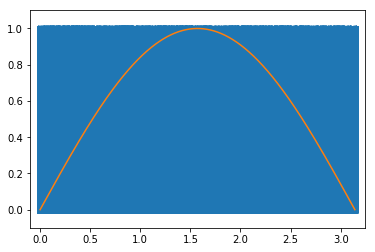

In [4]:
integra_mc(np.sin, 0, np.pi)

Donde podemos observar la parte naranja de puntos y la línea verde representando la función. El porcentaje de puntos que se encuentran por encima de la función es aproximadamente ≈ 36%.